# importing lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data

df = pd.read_csv('airbnb.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6904\4250129282.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
# handling missing values
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
df = df.drop(columns=['license','house_rules'], errors = 'ignore')
df.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [17]:
# converting last review to date time
df['last review'] = pd.to_datetime(df['last review'], errors= 'coerce')

# filling missing values
df.fillna({'review rate number':0,'last review': df['last review'].min()}, inplace=True)

# drop record with missing name and host name
df.dropna(subset=['NAME','host name'], inplace=True)

df.isnull().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified              276
host name                             0
neighbourhood group                  26
neighbourhood                        16
lat                                   8
long                                  8
country                             526
country code                        122
instant_bookable                     96
cancellation_policy                  70
room type                             0
Construction year                   200
price                               239
service fee                         268
minimum nights                      403
number of reviews                   182
last review                           0
reviews per month                 15763
review rate number                    0
calculated host listings count      318
availability 365                    420
dtype: int64

In [21]:
# remove dollar sign and convert data type to float
df['price'] = df['price'].replace('[\$,]','', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]','', regex=True).astype(float)
df['price'], df['service fee']

(0          966.0
 1          142.0
 2          620.0
 4          204.0
 5          577.0
            ...  
 102594     844.0
 102595     837.0
 102596     988.0
 102597     546.0
 102598    1032.0
 Name: price, Length: 101949, dtype: float64,
 0         193.0
 1          28.0
 2         124.0
 4          41.0
 5         115.0
           ...  
 102594    169.0
 102595    167.0
 102596    198.0
 102597    109.0
 102598    206.0
 Name: service fee, Length: 101949, dtype: float64)

In [22]:
# removing duplicates

df.drop_duplicates(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

# visualization 

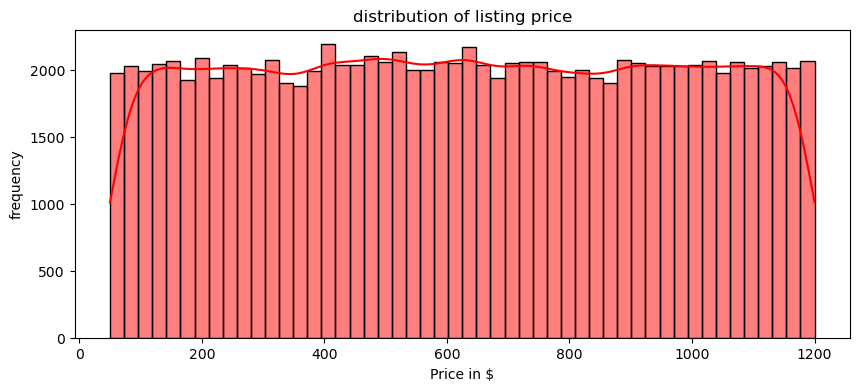

In [25]:
# distribution of listing price
plt.figure(figsize=(10,4))
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title('distribution of listing price')
plt.xlabel('Price in $')
plt.ylabel('frequency')
plt.show()

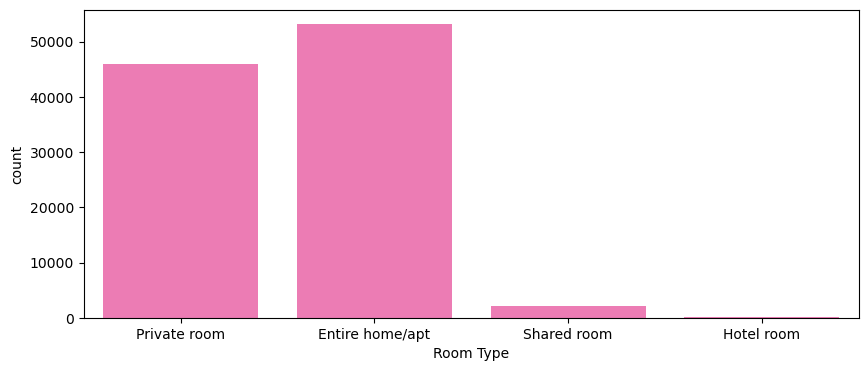

In [28]:
# how different types of room distributed
plt.figure(figsize=(10,4))
sns.countplot(x='room type', data=df, color='hotpink')
plt.xlabel('Room Type')
plt.ylabel('count')
plt.show()

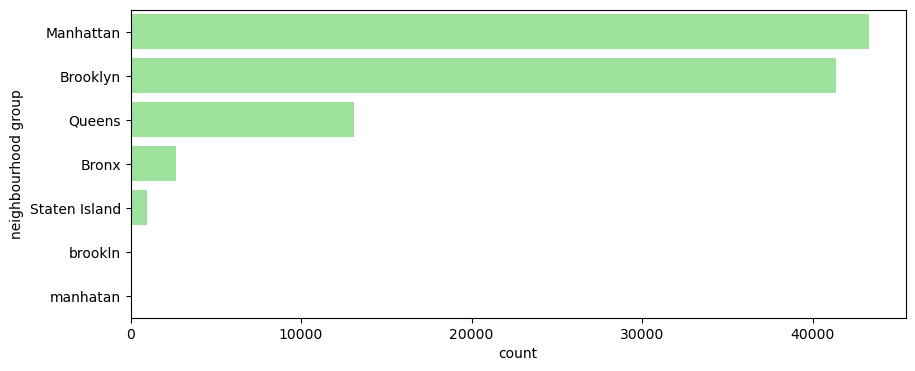

In [32]:
# how listings are distributed in neighborhoods
plt.figure(figsize=(10,4))
sns.countplot(y='neighbourhood group', data=df, color='lightgreen',order = df['neighbourhood group'].value_counts().index)
plt.xlabel('count')
plt.ylabel('neighbourhood group')
plt.show()

Text(0, 0.5, 'price')

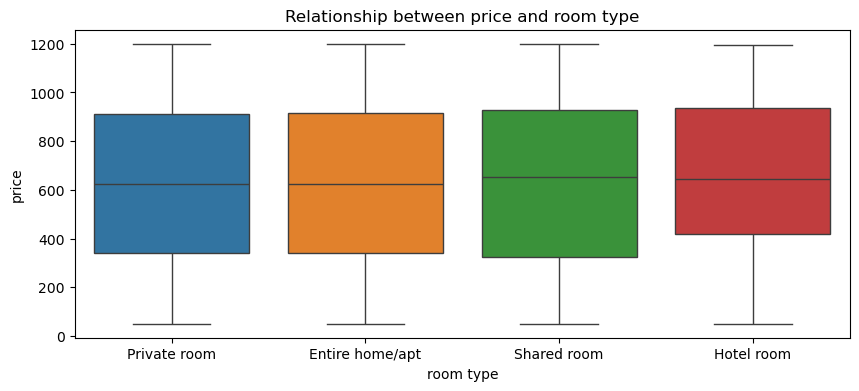

In [34]:
# relationship between price and room type
plt.figure(figsize=(10,4))
sns.boxplot(x='room type', y='price', hue='room type', data= df)
plt.title('Relationship between price and room type')
plt.xlabel('room type')
plt.ylabel('price')
